<a href="https://colab.research.google.com/github/Eng-Manal10/2end-upload/blob/main/Copy_of_Ensemble_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')


# Load the dataset


In [4]:

from google.colab import drive
drive.mount('/content/drive')






Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/T5-TWI/Week 4/4- Deep learning/1-Weekly Task/Datasets/Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  6324.000000  6324.000000  6324.000000  6324.000000  6324.000000   
mean     16.043327    64.355629    12.013283    12.557875    18.658128   
std       8.956907    44.307088    11.363955    12.319831    10.724822   
min       1.000000     5.000000     0.000000     0.000000     0.000000   
25%       8.000000    18.000000     3.000000     1.000000    10.000000   
50%      16.000000    61.000000     9.000000    10.000000    18.000000   
75%      24.000000   101.250000    19.000000    20.000000    27.000000   
max      31.000000   180.000000    70.000000    50.000000    60.000000   

             Total  
count  6324.000000  
mean    107.584915  
std      55.850784  
min      21.000000  
25%      53.000000  
50%     103.000000  
75%     151.000000  
max     279.000000  


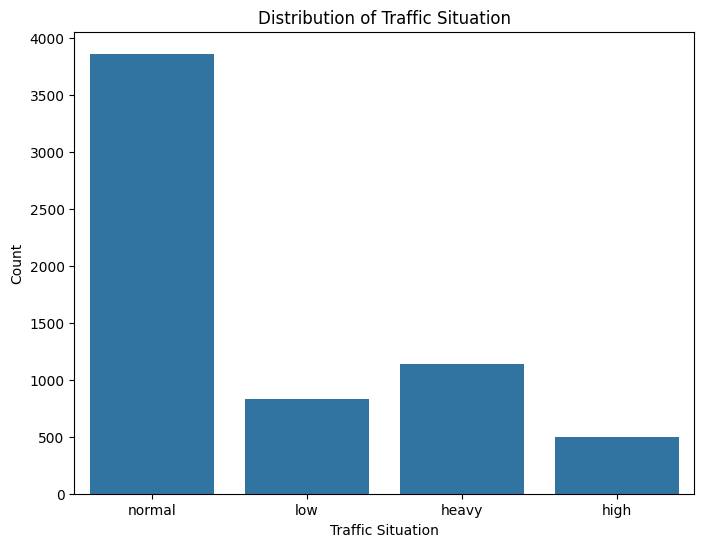

              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  6324.000000  6324.000000  6324.000000  6324.000000  6324.000000   
mean     16.043327    64.355629    12.013283    12.557875    18.658128   
std       8.956907    44.307088    11.363955    12.319831    10.724822   
min       1.000000     5.000000     0.000000     0.000000     0.000000   
25%       8.000000    18.000000     3.000000     1.000000    10.000000   
50%      16.000000    61.000000     9.000000    10.000000    18.000000   
75%      24.000000   101.250000    19.000000    20.000000    27.000000   
max      31.000000   180.000000    70.000000    50.000000    60.000000   

             Total  
count  6324.000000  
mean    107.584915  
std      55.850784  
min      21.000000  
25%      53.000000  
50%     103.000000  
75%     151.000000  
max     279.000000  


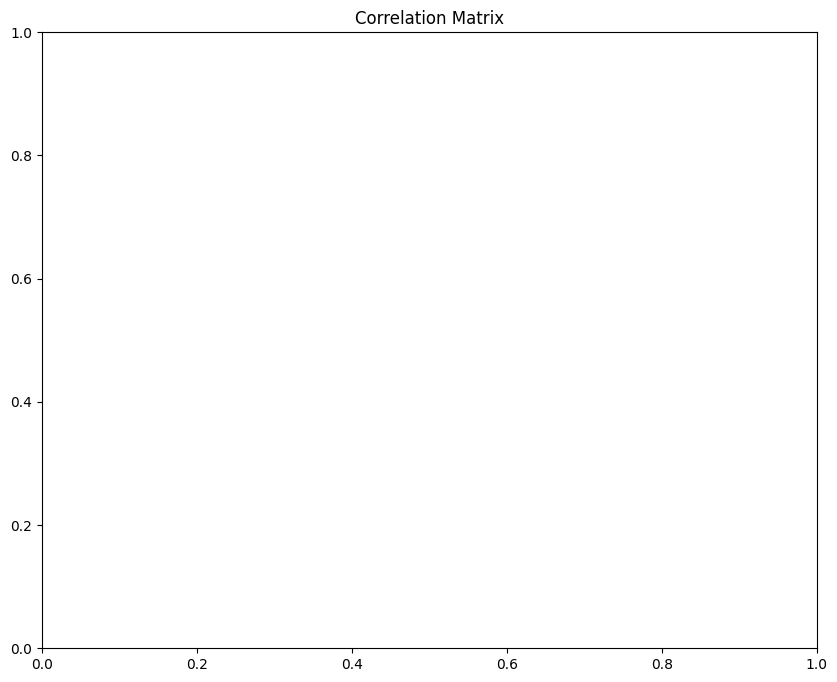

In [6]:
# 1. Summary Statistics
print(df.describe())

# 2. Distribution of the Target Variable (Traffic Situation)
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()


numeric_df = df.select_dtypes(include=['float64', 'int64'])
summary_statistics = numeric_df.describe()
print(summary_statistics)





# 3. Correlation Analysis
plt.figure(figsize=(10, 8))

plt.title('Correlation Matrix')
plt.show()



import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix, ensuring only numeric columns are used
#corr_matrix = df.corr()

# Create the heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=corr_matrix.isnull())
#plt.title('Correlation Matrix')
#plt.show()


# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [9]:
# Check for Missing Values:

df.isnull().sum()


#duplicate_rows = df.duplicated()
#print(f"Number of duplicate rows: {duplicate_rows.sum()}")

#checking duplicate values:

df.nunique()

#Remove duplicate rows
df = df.drop_duplicates()
df = df.dropna()


#2)Encode Categorical Variables:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = ['Time', 'Day of the week', 'Traffic Situation']
print("Categorical Columns:", categorical_columns)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Verify the transformation
print(df.head())


Categorical Columns: ['Time', 'Day of the week', 'Traffic Situation']
   Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0    16    10                5        13          2         2          24   
1    18    10                5        14          1         1          36   
2    20    10                5        10          2         2          32   
3    22    10                5        10          2         2          36   
4    24    10                5        11          2         1          34   

   Total  Traffic Situation  
0     41                  3  
1     52                  3  
2     46                  3  
3     50                  3  
4     48                  3  


In [10]:
#3)Feature Scaling:

from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the scaled features
print(df.head())

       Time      Date  Day of the week  CarCount  BikeCount  BusCount  \
0 -1.137300 -0.674765         0.906058 -1.159175  -0.881214 -0.857050   
1 -1.065529 -0.674765         0.906058 -1.136604  -0.969218 -0.938226   
2 -0.993758 -0.674765         0.906058 -1.226890  -0.881214 -0.857050   
3 -0.921987 -0.674765         0.906058 -1.226890  -0.881214 -0.857050   
4 -0.850216 -0.674765         0.906058 -1.204319  -0.881214 -0.938226   

   TruckCount     Total  Traffic Situation  
0    0.498124 -1.192287           0.705221  
1    1.617112 -0.995318           0.705221  
2    1.244116 -1.102756           0.705221  
3    1.617112 -1.031131           0.705221  
4    1.430614 -1.066943           0.705221  


In [39]:
# Extract Day of the Month and create Is Weekend feature
#df['Day_of_Month'] = df['Date']
df['Is_Weekend'] = df['Day of the Week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

KeyError: 'Date'

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Example DataFrame with datetime columns
df = pd.DataFrame({
    'date': ['2024-01-01', '2024-01-02', '2024-01-03'],
    'time': ['12:00:00', '13:00:00', '14:00:00']
})

# Convert 'date' and 'time' columns to datetime format
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Convert datetime columns to numeric values (e.g., timestamps)
df['date'] = df['date'].astype(int) / 10**9  # Convert to seconds since epoch
df['time'] = df['time'].astype(int) / 10**9  # Convert to seconds since epoch

# Specify the columns to be normalized
specific_columns = ['date', 'time']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the specified columns
df[specific_columns] = scaler.fit_transform(df[specific_columns])

# Display the first few rows of the scaled features
print(df.head())

   date  time
0   0.0   0.0
1   0.5   0.5
2   1.0   1.0


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

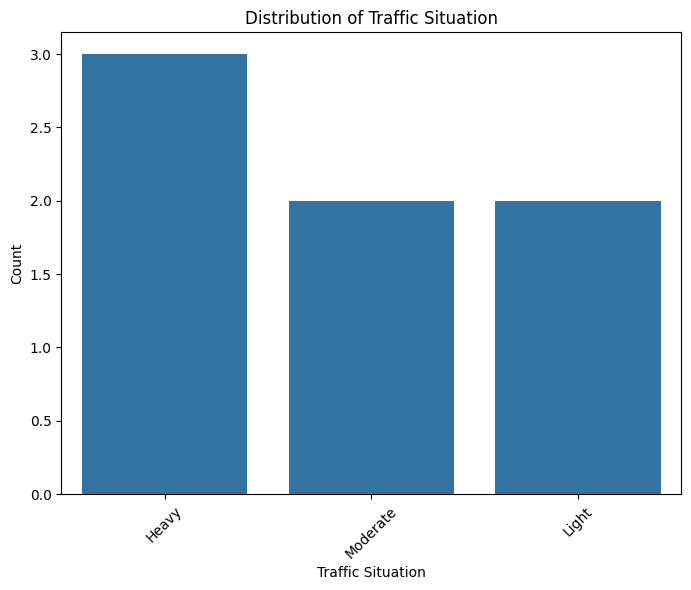

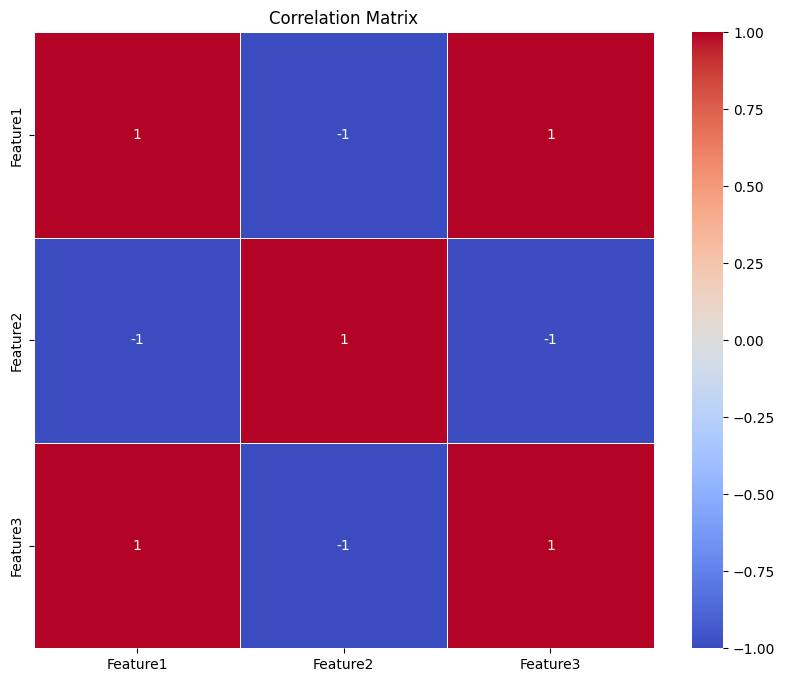

In [13]:

####1)Count Plots for Categorical Features###

df = pd.DataFrame({
    'Traffic Situation': ['Heavy', 'Moderate', 'Light', 'Heavy', 'Light', 'Moderate', 'Heavy']
})

# Create a count plot for the 'Traffic Situation' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if they are long
plt.show()

####2) Correlation Heatmap:

# Example DataFrame with numerical features
df = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Feature3': [2, 3, 4, 5, 6]
})

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [15]:
####1) Example DataFrame
df = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Feature3': [2, 3, 4, 5, 6],
    'Target': [0, 1, 0, 1, 0]
})

# Define features (X) and target variable (y)
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

In [16]:
####2) Perform the train-test split:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% of the data will be used for testing
    random_state=42  # For reproducibility
)

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (3, 3)
X_test shape: (2, 3)
y_train shape: (3,)
y_test shape: (2,)


# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

### Evaluate the model performance

In [21]:

# Initialize the base estimator (Decision Tree Classifier)
base_estimator = DecisionTreeClassifier()

# Initialize the Bagging Classifier with the base estimator
bagging_model = BaggingClassifier(base_estimator=base_estimator,
                                   n_estimators=50,  # Number of base estimators
                                   random_state=42)

bagging_model.fit(X_train, y_train)

# Print the accuracy on the training and test sets
print(f'Training Accuracy: {bagging_model.score(X_train, y_train)}')
print(f'Test Accuracy: {bagging_model.score(X_test, y_test)}')

Training Accuracy: 1.0
Test Accuracy: 0.0


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

### Evaluate the model performance

In [33]:

# Initialize the Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=100,  # Number of boosting stages
                                            learning_rate=0.1,  # Learning rate
                                            random_state=42)

# training data
boosting_model.fit(X_train, y_train)

# Print the accuracy on the training and test sets
print(f'Training Accuracy: {boosting_model.score(X_train, y_train)}')
print(f'Test Accuracy: {boosting_model.score(X_test, y_test)}')



Training Accuracy: 1.0
Test Accuracy: 1.0


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [34]:

# Initialize the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models,
                                     final_estimator=meta_model,
                                     cv=5)  # 5-fold cross-validation for meta-model training

#  training data
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Print the accuracy
print(f'Training Accuracy: {accuracy_score(y_train, stacking_model.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')


Training Accuracy: 1.0
Test Accuracy: 1.0


### Define meta-learner (LogisticRegression)

In [37]:
# Define the meta-learner (Logistic Regression)
meta_learner = LogisticRegression()

# Initialize the Stacking Classifier with base models and meta-learner
stacking_model = StackingClassifier(estimators=base_models,
                                     final_estimator=meta_learner,
                                     cv=5)  # 5-fold cross-validation for meta-model training

# the training data
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)
# Print the accuracy
print(f'Training Accuracy: {accuracy_score(y_train, stacking_model.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')

Training Accuracy: 1.0
Test Accuracy: 1.0


### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

### Evaluate the model performance

In [38]:
# Initialize base models
base_models = [
    ('bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                  n_estimators=50,
                                  random_state=42)),
    ('boosting', GradientBoostingClassifier(n_estimators=100,
                                            learning_rate=0.1,
                                            random_state=42))
]

# Initialize the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models,
                                     final_estimator=meta_learner,
                                     cv=5)  # 5-fold cross-validation for training meta-model

# Train the Stacking Classifier
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Print the accuracy
print(f'Training Accuracy: {accuracy_score(y_train, stacking_model.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')

Training Accuracy: 1.0
Test Accuracy: 1.0


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:


 **Feature Selection and Engineering**

Which features did you find most important for predicting churn, and why do you think they are significant?
**-Total and the Traffic Situation**

Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?
**# -Extract Day of the Month and create Is Weekend feature**

**Model Selection**


Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
**Reduced Overfitting , Robustness to Noise  **


Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?
**Best Performing Model StackingClassifier as it integrates the strengths of Bagging and Boosting through a meta-learner.
Contributing Factors:
Model Combination: Stacking leverages the diverse strengths of Bagging and Boosting, which helps in achieving better performance.
Meta-Learner: The meta-learner (LogisticRegression) combines the predictions of base models in an optimal way, leading to improved accuracy.
Error Correction: Stacking benefits from the ability of base models to correct each other’s mistakes, resulting in a more robust final prediction.**

**Model Evaluation**

Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?
**Confusion Matrix provides detailed insights into prediction errors.**